# Data Analysis för framtids sägrar!

# TBD
* add women to list!
* sams result matrix

In [507]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import math
import matplotlib.ticker as mtick
import datetime

## get data from pickle

In [255]:
# check out available files
%ls data

results_2022_M_10001_11000.pickle  results_2022_M_4001_5000.pickle
results_2022_M_1001_2000.pickle    results_2022_M_5001_6000.pickle
results_2022_M_1_100.pickle        results_2022_M_6001_7000.pickle
results_2022_M_1_1000.pickle       results_2022_M_7001_8000.pickle
results_2022_M_1_2.pickle          results_2022_M_8001_9000.pickle
results_2022_M_1_4.pickle          results_2022_M_9001_10000.pickle
results_2022_M_2001_3000.pickle    results_2022_W_1001_2000.pickle
results_2022_M_2001_4000.pickle    results_2022_W_1_1000.pickle
results_2022_M_3001_4000.pickle


In [257]:
def get_and_concat_dfs(file_list):
    df = pd.DataFrame()
    for file in file_list:
        with open(f'data/{file}', 'rb') as f:
            df_tmp = pickle.load(f)
    
            # convert to datetime
            df_tmp['Time'] = pd.to_datetime(df_tmp['Time'])
            df = pd.concat([df,df_tmp], axis=0)
            df.reset_index(drop=True, inplace=True)

            # for easier sorting: string to int
            df['StartGroup_int'] = df['StartGroup'].str.extract('(\d+)', expand=False).astype(int)

    return(df)

# GET DATA
df = get_and_concat_dfs(['results_2022_M_1_1000.pickle',
                         'results_2022_M_1001_2000.pickle',
                         'results_2022_M_2001_4000.pickle',
                         'results_2022_M_4001_5000.pickle',
                         'results_2022_M_5001_6000.pickle',
                         'results_2022_M_6001_7000.pickle',
                         'results_2022_M_7001_8000.pickle',
                         'results_2022_M_8001_9000.pickle',
                         'results_2022_M_9001_10000.pickle',
                         'results_2022_M_10001_11000.pickle',
                         'results_2022_W_1_1000.pickle',
                         'results_2022_W_1001_2000.pickle'])
df.shape

(12043, 11)

In [6]:
df.columns

Index(['Bib', 'Group', 'Name', 'Nation', 'Sex', 'Place', 'StartGroup', 'Time',
       'Place_cat', 'Year', 'StartGroup_int'],
      dtype='object')

In [258]:
df

,Bib,Group,Name,Nation,Sex,Place,StartGroup,Time,Place_cat,Year,StartGroup_int
0,M15,H21,"Nygaard, Andreas",NOR,Sex.M,1,VL0,2022-09-11 03:32:18,1,2022,0
1,M4,H21,"Persson, Emil",SWE,Sex.M,2,VL0,2022-09-11 03:32:19,2,2022,0
2,M49,H21,"Jutterström, Axel",SWE,Sex.M,3,VL0,2022-09-11 03:32:20,3,2022,0
3,M29,H21,"Stadaas, Kasper",NOR,Sex.M,4,VL0,2022-09-11 03:32:21,4,2022,0
4,M32,H21,"Thele, Joar Andreas",NOR,Sex.M,5,VL0,2022-09-11 03:32:21,5,2022,0
...,...,...,...,...,...,...,...,...,...,...,...
12038,19693,D21,"Joelsson, Ida",SWE,Sex.W,12039,VL10,2022-09-11 12:13:35,1986,2022,10
12039,19037,D35,"Öhlen, Betty",SWE,Sex.W,12041,VL10,2022-09-11 12:14:31,1987,2022,10
12040,19326,D45,"Lychnell, Maria",SWE,Sex.W,12043,VL10,2022-09-11 12:16:01,1988,2022,10
12041,19668,D21,"Hed, Amanda",SWE,Sex.W,12046,VL10,2022-09-11 12:21:35,1989,2022,10


# Number of finishers per startblock
* (not sure how many started though)

In [259]:
df['StartGroup'].unique()

array(['VL0', 'VL1', 'VL2', 'VL3', 'VL4', 'VL6', 'VL5', 'VL10', 'VL7',
       'VL8', 'VL9'], dtype=object)

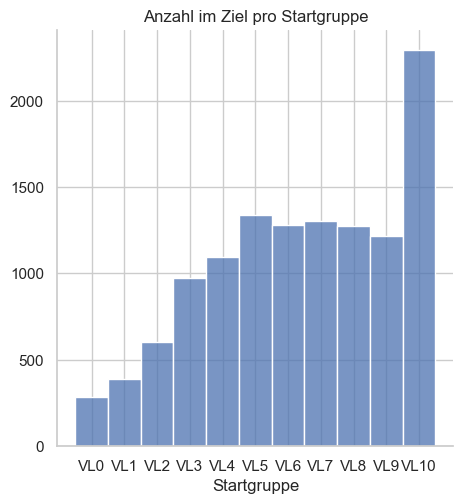

In [298]:
sns.set_style('darkgrid')
#sns.set_theme(style="whitegrid")
sns.set_style("whitegrid")#, {'axes.grid' : False})

ax = sns.displot(df.sort_values(by='StartGroup_int')['StartGroup'])

ax.set(ylabel=None)
ax.set(xlabel="Startgruppe")
plt.title('Anzahl im Ziel pro Startgruppe')
plt.show()

In [261]:
p_max = int(df[['Place']].max())
p_median = math.floor(p_max/2)
p_quartile = math.floor(p_max*1/4)

for p_i in [p_max, p_median, 2000]:
    print(f"{p_i}: StartGroup: {df[df['Place']==p_i]['StartGroup'].values[0]}")

12050: StartGroup: VL5
6025: StartGroup: VL6
2000: StartGroup: VL3


In [262]:
df[df['Place']==p_median]['StartGroup'].values[0]

'VL6'

In [263]:
df_startblocks = df.groupby(by=['StartGroup_int'])[['Group']].count()
df_startblocks.rename(columns={'Group': 'size'}, inplace=True)
df_startblocks['percentage'] = df_startblocks['size']/df_startblocks['size'].sum()
print('percentage of racers from Startgroups')
df_startblocks['percentage'].sort_index()

percentage of racers from Startgroups


StartGroup_int
0     0.023748
1     0.032218
2     0.050071
3     0.080794
4     0.090675
5     0.110936
6     0.106286
7     0.108196
8     0.105788
9     0.100805
10    0.190484
Name: percentage, dtype: float64

In [264]:
in_front_perc_list = []
behind_perc_list = []
in_front_list = []
behind_list = []
for i in list(range(0,df_startblocks.shape[0])):
    in_front_perc_list.append(df_startblocks['percentage'][0:i].sum())
    behind_perc_list.append(df_startblocks['percentage'][i+1:].sum())
    in_front_list.append(df_startblocks['size'][0:i].sum())
    behind_list.append(df_startblocks['size'][i+1:].sum())

df_startblocks['percentage_in_front_of_you'] = in_front_perc_list
df_startblocks['percentage_behind_you'] = behind_perc_list
df_startblocks['number_in_front_of_you'] = in_front_list
df_startblocks['number_behind_you'] = behind_list
df_startblocks

,size,percentage,percentage_in_front_of_you,percentage_behind_you,number_in_front_of_you,number_behind_you
StartGroup_int,,,,,,
0,286,0.023748,0.000000,0.976252,0,11757
1,388,0.032218,0.023748,0.944034,286,11369
2,603,0.050071,0.055966,0.893963,674,10766
3,973,0.080794,0.106037,0.813169,1277,9793
4,1092,0.090675,0.186831,0.722494,2250,8701
5,1336,0.110936,0.277506,0.611559,3342,7365
6,1280,0.106286,0.388441,0.505273,4678,6085
7,1303,0.108196,0.494727,0.397077,5958,4782
8,1274,0.105788,0.602923,0.291290,7261,3508


## startgroup: number of finishers before and after 

In [453]:
n = int(len(df_startblocks.index))
table_list = []
mask_l = []
for index, row in df_startblocks.iterrows():
    if index == 0: 
        row_list = [index,row['percentage_behind_you']] + [0]*(n-2)
        mask_list = [False] + [True]*(n-1)
    elif index == n-1:
        row_list = [0]*(index-1) + [row['percentage_in_front_of_you'],index]
        mask_list = [True]*(index) + [False] 
    else:
        row_list = [0]*(index-1) + [row['percentage_in_front_of_you'],index,row['percentage_behind_you']] + [0]*(n-index-2)
        mask_list = [True]*(index) + [False] + [True]*(n-index-1)
    table_list.append(row_list)
    mask_l.append(mask_list)
df_plot = pd.DataFrame(table_list)
df_mask = pd.DataFrame(mask_l)


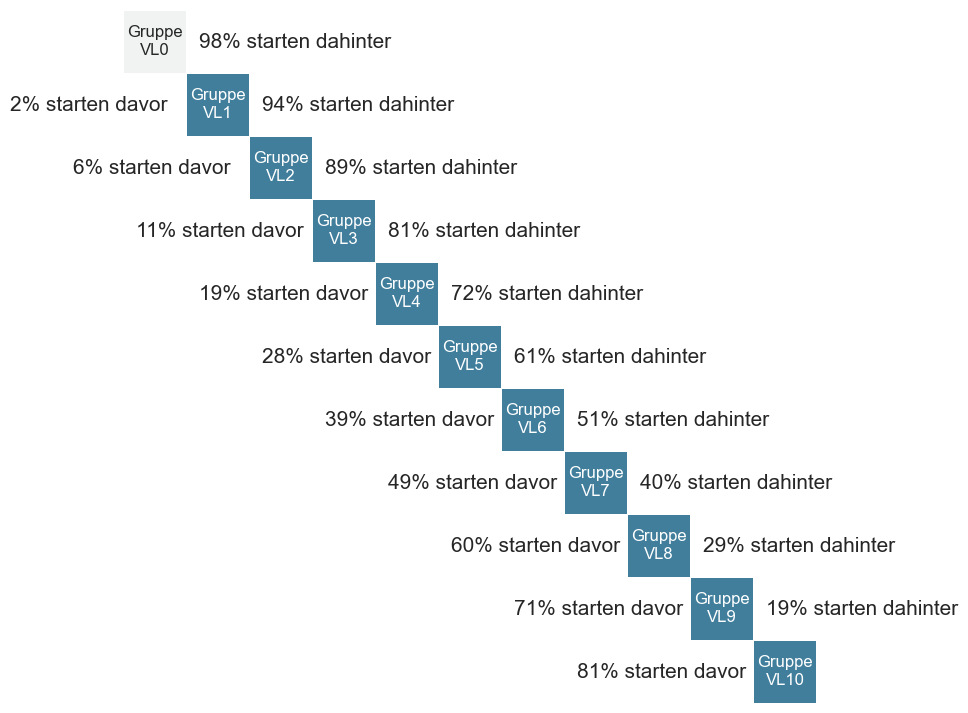

In [456]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

sns.set_theme(style="white")

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 230, as_cmap=True)

# create plot
sns.heatmap(df_plot, mask=df_mask, cmap=cmap, vmax=.3, center=0, annot=True, 
            square=True, linewidths=.5, cbar=False, cbar_kws={"shrink": .5}, yticklabels=False, xticklabels=False)

for t in ax.texts: t.set_text("Gruppe\n" + "VL"+t.get_text())

# calculate coordinates
y_behind_start = 0.6
y_behind_end = 9.6
y_behind = [y_behind_start]

x_behind_start = 1.2
x_behind_end = 10.2
x_behind = [x_behind_start]
x_offset = 4
for i in list(range(0,n-1)):
    y_behind.append(y_behind[-1]+(y_behind_end-y_behind_start)/9)
    x_behind.append(x_behind[-1]+(x_behind_end-x_behind_start)/9)

# plot values as text ...
for i in list(range(1,n-1)):
    # texte davor
    ax.text(x_behind[i]-x_offset, y_behind[i],f'{df_plot.iloc[i][i-1]:.0%} starten davor', fontsize=15) #add text
    ax.text(x_behind[i], y_behind[i],f'{df_plot.iloc[i][i+1]:.0%} starten dahinter', fontsize=15) #add text

# add first
ax.text(x_behind[0], y_behind[0],f'{df_plot.iloc[0][0+1]:.0%} starten dahinter', fontsize=15)
# add last
ax.text(x_behind[n-1]-x_offset, y_behind[n-1],f'{df_plot.iloc[n-1][n-2]:.0%} starten davor', fontsize=15) #add text

#plt.title('Startblöcke (angenähert mit Resultatliste)')

# show plot
plt.show()

## startgroup: number of finishers before and after 


In [302]:
n = int(len(df_startblocks.index))
table_list = []
mask_l = []
for index, row in df_startblocks.iterrows():
    if index == 0: 
        row_list = [index,row['number_behind_you']] + [0]*(n-2)
        mask_list = [False] + [True]*(n-1)
    elif index == n-1:
        row_list = [0]*(index-1) + [row['number_in_front_of_you'],index]
        mask_list = [True]*(index) + [False] 
    else:
        row_list = [0]*(index-1) + [row['number_in_front_of_you'],index,row['number_behind_you']] + [0]*(n-index-2)
        mask_list = [True]*(index) + [False] + [True]*(n-index-1)
    table_list.append(row_list)
    mask_l.append(mask_list)
df_plot = pd.DataFrame(table_list)
df_mask = pd.DataFrame(mask_l)

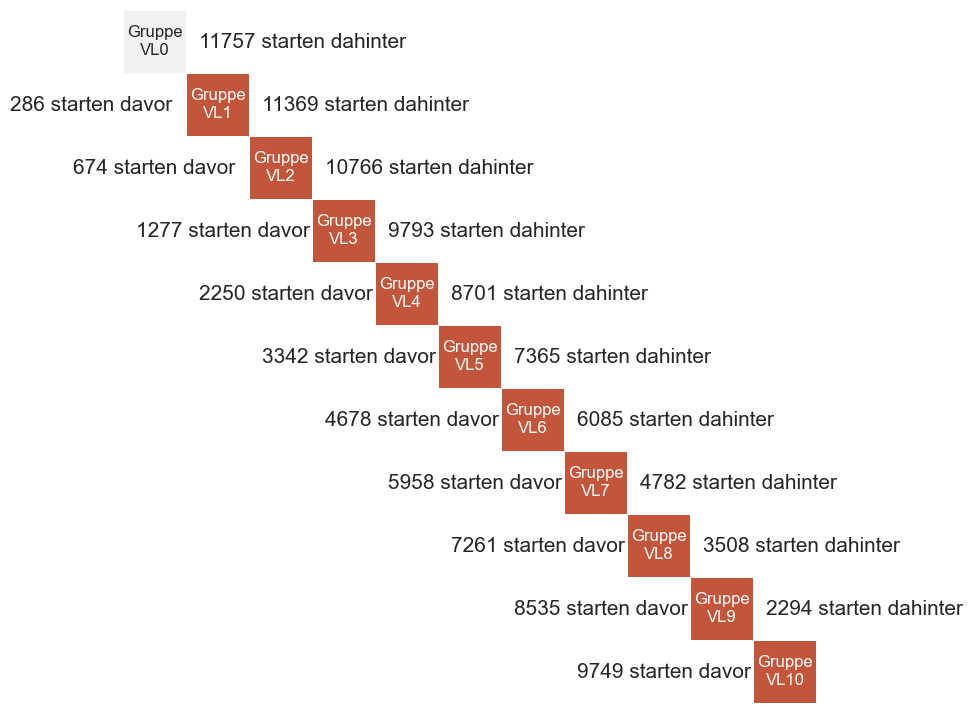

In [303]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# create plot
sns.heatmap(df_plot, mask=df_mask, cmap=cmap, vmax=.3, center=0, annot=True, 
            square=True, linewidths=.5, cbar=False, cbar_kws={"shrink": .5}, yticklabels=False, xticklabels=False)

# add stuff around data
for t in ax.texts: t.set_text("Gruppe\n" + "VL"+t.get_text())

# calculate coordinates
y_behind_start = 0.6
y_behind_end = 9.6
y_behind = [y_behind_start]

x_behind_start = 1.2
x_behind_end = 10.2
x_behind = [x_behind_start]
x_offset = 4
for i in list(range(0,n-1)):
    y_behind.append(y_behind[-1]+(y_behind_end-y_behind_start)/9)
    x_behind.append(x_behind[-1]+(x_behind_end-x_behind_start)/9)

# plot values as text ...
for i in list(range(1,n-1)):
    # texte davor
    ax.text(x_behind[i]-x_offset, y_behind[i],f'{df_plot.iloc[i][i-1]:.0f} starten davor', fontsize=15) #add text
    ax.text(x_behind[i], y_behind[i],f'{df_plot.iloc[i][i+1]:.0f} starten dahinter', fontsize=15) #add text

# add first
ax.text(x_behind[0], y_behind[0],f'{df_plot.iloc[0][0+1]:.0f} starten dahinter', fontsize=15)
# add last
ax.text(x_behind[n-1]-x_offset, y_behind[n-1],f'{df_plot.iloc[n-1][n-2]:.0f} starten davor', fontsize=15) #add text

# show plot
plt.show()

In [245]:
df_startblocks

,size,percentage,percentage_in_front_of_you,percentage_behind_you,number_in_front_of_you,number_behind_you
StartGroup_int,,,,,,
0,238,0.023817,0.000000,0.976183,0,9755
1,386,0.038627,0.023817,0.937556,238,9369
2,587,0.058741,0.062444,0.878815,624,8782
3,927,0.092765,0.121185,0.786050,1211,7855
4,1024,0.102472,0.213950,0.683579,2138,6831
5,1216,0.121685,0.316421,0.561893,3162,5615
6,1098,0.109877,0.438107,0.452016,4378,4517
7,1057,0.105774,0.547984,0.346242,5476,3460
8,998,0.099870,0.653758,0.246372,6533,2462


# Participating Nations
* Total number
* in startblocks (barplots 100%)
* at finish (1000 racers bins, barplots 100%)
* CDF per nation (stacked) over Startgroups and 1000er bins

In [305]:
sns.set_style('whitegrid')
sns.displot(df['Nation'])

In [319]:
df_nation = df.groupby(by=['Nation']).count()[['Bib']]
df_nation = df_nation.rename(columns={'Bib':'count'})
df_nation['percentage'] = df_nation['count']/df_nation['count'].sum()
df_nation = df_nation.sort_values(by='percentage', ascending=False)
df_nation

,count,percentage
Nation,,
SWE,9349,0.776302
NOR,609,0.050569
FIN,360,0.029893
DEN,351,0.029146
CZE,327,0.027153
GER,230,0.019098
SUI,142,0.011791
EST,133,0.011044
ITA,116,0.009632


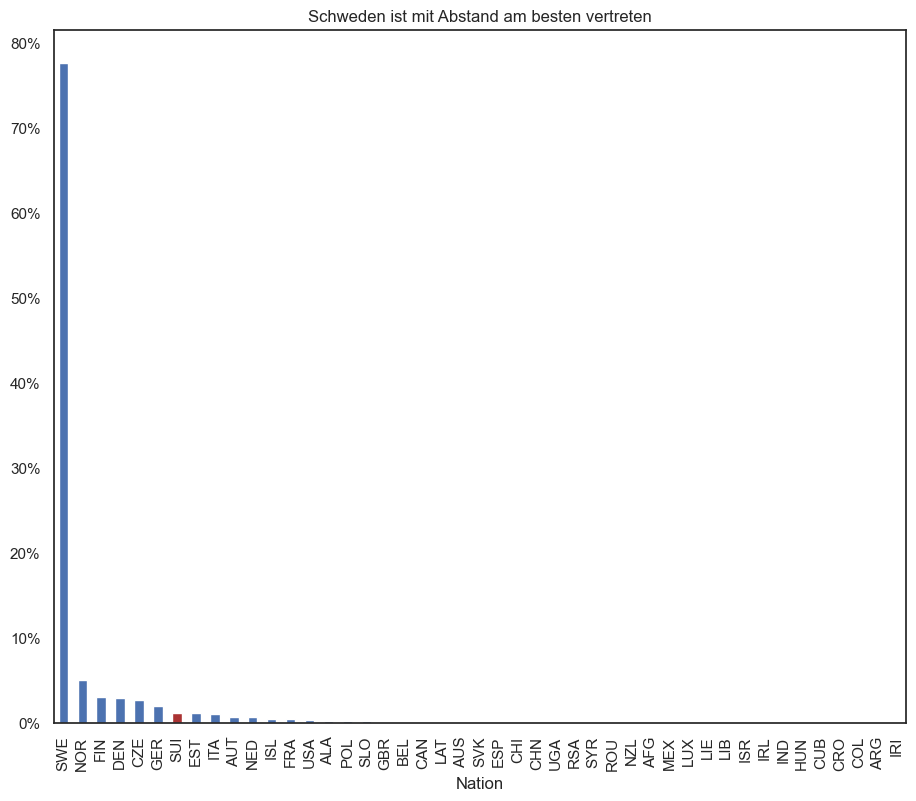

In [399]:
mask = df_nation.index.isin([])
df_plot = df_nation.loc[~mask]
ax = df_plot[['percentage']].plot.bar(title='participants per nation [%]', figsize=(11,9),legend=False)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title('Schweden ist mit Abstand am besten vertreten')
pos = np.where(df_plot.index.isin(['SUI'])==True)[0][0]
ax.patches[pos].set_facecolor('#aa3333')
ax.annotate(str(ax.patches[0].get_height()),(ax.patches[0].get_x())
plt.show()

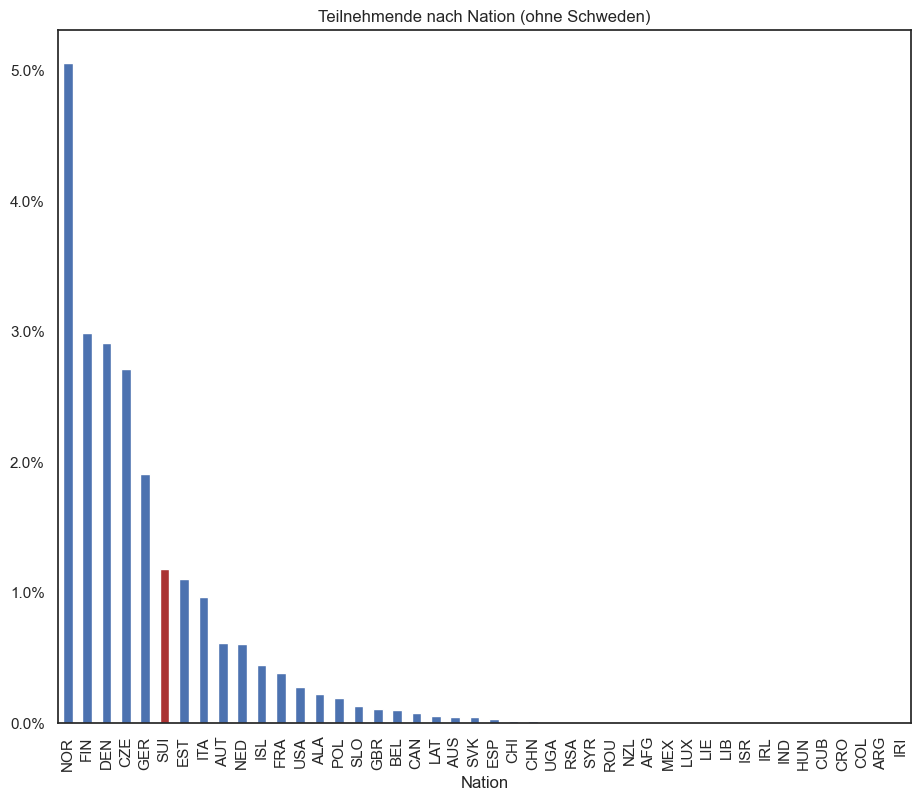

In [400]:
mask = df_nation.index.isin(['SWE'])
df_plot = df_nation.loc[~mask]
ax = df_plot[['percentage']].plot.bar(title='participants per nation [%]', figsize=(11,9),legend=False)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title('Teilnehmende nach Nation (ohne Schweden)')
pos = np.where(df_plot.index.isin(['SUI'])==True)[0][0]
ax.patches[pos].set_facecolor('#aa3333')
plt.show()

### per Startgroup

In [417]:
# massage data into right format
df_stgroup_nation = df.groupby(by=['StartGroup','Nation'], as_index=False).count()[['StartGroup','Nation','Bib']]
df_stgroup_nation = df_stgroup_nation.pivot(index='StartGroup',columns='Nation',values='Bib').fillna(0)
df_stgroup_nation = df_stgroup_nation.sort_values(by='VL1',axis=1,ascending=False)
df_stgroup_nation

Nation,SWE,NOR,FIN,CZE,ITA,GER,SUI,EST,DEN,ALA,...,CHN,CRO,ISR,CUB,ESP,GBR,HUN,IND,IRL,IRI
StartGroup,,,,,,,,,,,,,,,,,,,,,
VL0,126.0,81.0,21.0,14.0,13.0,11.0,6.0,2.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
VL1,268.0,49.0,22.0,14.0,8.0,6.0,6.0,3.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VL10,1865.0,42.0,36.0,37.0,14.0,45.0,16.0,6.0,112.0,0.0,...,0.0,1.0,0.0,1.0,2.0,7.0,0.0,0.0,0.0,0.0
VL2,408.0,76.0,30.0,19.0,12.0,15.0,9.0,7.0,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VL3,687.0,70.0,38.0,53.0,13.0,24.0,23.0,23.0,9.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VL4,832.0,63.0,37.0,36.0,9.0,18.0,14.0,25.0,26.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VL5,1077.0,57.0,37.0,33.0,8.0,26.0,12.0,23.0,24.0,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
VL6,983.0,56.0,47.0,28.0,24.0,37.0,17.0,20.0,34.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VL7,1044.0,50.0,35.0,35.0,7.0,16.0,17.0,10.0,53.0,5.0,...,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0


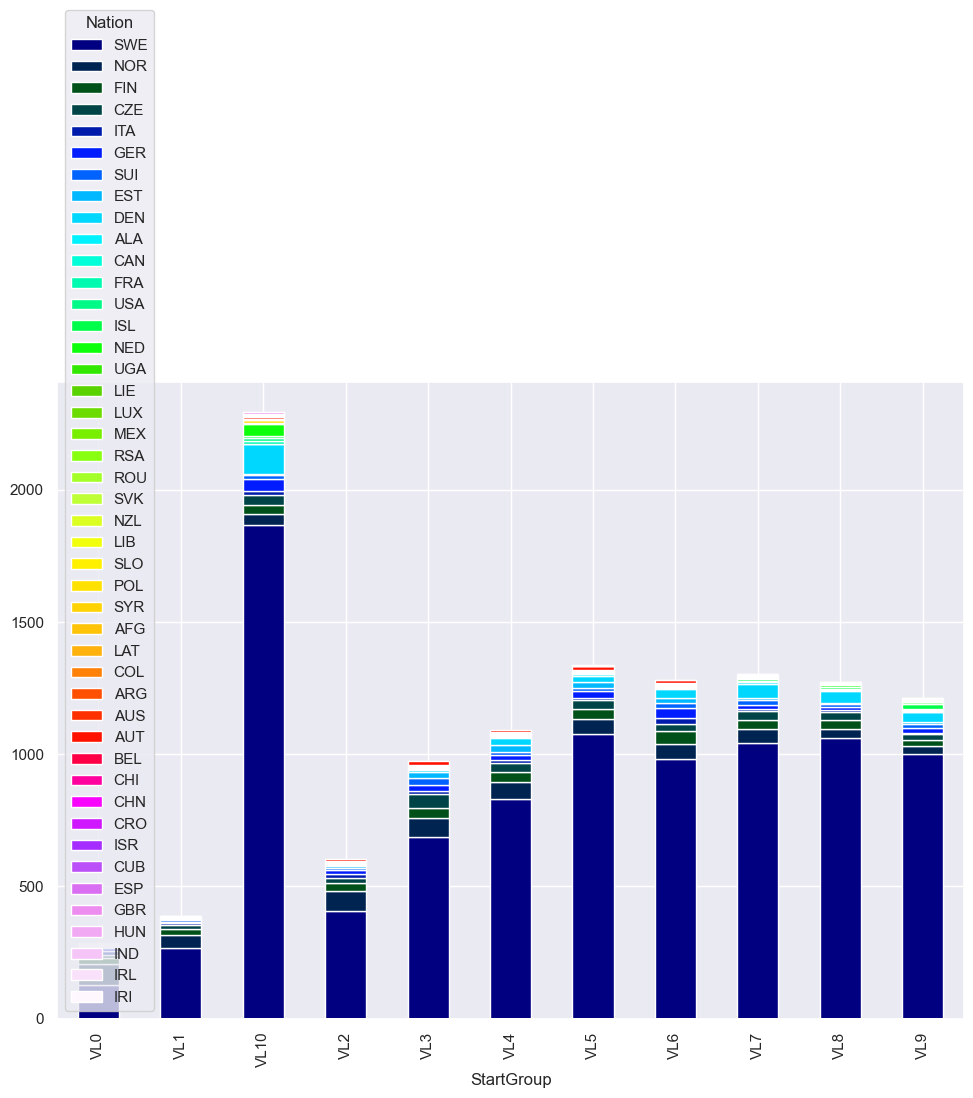

In [420]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})

df_stgroup_nation.plot(kind='bar', stacked=True, colormap='gist_ncar')
plt.show()

In [464]:
df_plot = df.groupby(by=['Nation'], as_index=True).median()[['StartGroup_int','Place']]
df_plot2 = df.groupby(by=['Nation'], as_index=True).count()[['StartGroup_int']].rename(columns={'StartGroup_int': 'Teilnehmende'})
df_plot = df_plot.merge(df_plot2, how='left', left_index=True, right_index=True).rename(columns={'StartGroup_int': 'Median Startgruppe', 'Place': 'Median Schlussrang'}).reset_index()
df_plot = df_plot.sort_values(by="Median Schlussrang", ascending=True)
df_plot = df_plot.set_index([pd.Index(list(range(df_plot.shape[0])))]).reset_index().rename(columns={'index': 'Nationsranking'})
df_plot['Nationsranking'] = df_plot['Nationsranking']+1
df_plot[['Nationsranking','Nation','Median Schlussrang','Teilnehmende']]

,Nationsranking,Nation,Median Schlussrang,Teilnehmende
0,1,LUX,530.0,1
1,2,LIE,1554.0,1
2,3,CHN,2137.0,2
3,4,NOR,2615.0,609
4,5,ALA,3223.0,27
5,6,IRI,3422.0,1
6,7,AUT,3425.5,74
7,8,EST,3765.0,133
8,9,ROU,4171.0,1
9,10,AUS,4343.5,6


In [480]:
list(df[df['Nation']=='SUI'].sort_values(['Place'])['Place'])[71]

5269

# startblock vs. results
* overlapping distributions for all startblocks
* same with boxplots (easier readable?) 
* mit ihrem neuen Seeding vergleichen https://www.vasaloppet.se/lopp/skidlopp/vasaloppet/seedning/seedningstabeller/
* wie viele haben sich mindestens eine Gruppe verbessert (Seeding)
* who advanced most? (not sure where EXACTLY they started in their block)

In [578]:
# Seedning from https://www.vasaloppet.se/lopp/skidlopp/vasaloppet/seedning/seedningstabeller/
seedning_2022_for_2023 = [datetime.datetime(2022, 9, 11, 4, 0, 54, 0), 
                          datetime.datetime(2022, 9, 11, 4, 30, 43, 0),
                          datetime.datetime(2022, 9, 11, 4, 55, 43, 0),
                          datetime.datetime(2022, 9, 11, 5, 35, 36, 0),
                          datetime.datetime(2022, 9, 11, 6, 15, 40, 0),
                          datetime.datetime(2022, 9, 11, 6, 56, 9, 0),
                          datetime.datetime(2022, 9, 11, 7, 42, 33, 0),
                          datetime.datetime(2022, 9, 11, 8, 35, 42, 0),
                          datetime.datetime(2022, 9, 11, 10, 2, 47, 0),
                          datetime.datetime(2022, 9, 11, 12, 1, 48, 0)]

seedning_2022_for_2023_dict = {
                          'VL0': datetime.datetime(2022, 9, 11, 4, 0, 54, 0), 
                          'VL1': datetime.datetime(2022, 9, 11, 4, 30, 43, 0),
                          'VL2': datetime.datetime(2022, 9, 11, 4, 55, 43, 0),
                          'VL3': datetime.datetime(2022, 9, 11, 5, 35, 36, 0),
                          'VL4': datetime.datetime(2022, 9, 11, 6, 15, 40, 0),
                          'VL5': datetime.datetime(2022, 9, 11, 6, 56, 9, 0),
                          'VL6': datetime.datetime(2022, 9, 11, 7, 42, 33, 0),
                          'VL7': datetime.datetime(2022, 9, 11, 8, 35, 42, 0),
                          'VL8': datetime.datetime(2022, 9, 11, 10, 2, 47, 0),
                          'VL9': datetime.datetime(2022, 9, 11, 12, 1, 48, 0)}


In [509]:
seedning_2022_for_2023_dict[startgroup]

datetime.datetime(2022, 3, 12, 4, 55, 43)

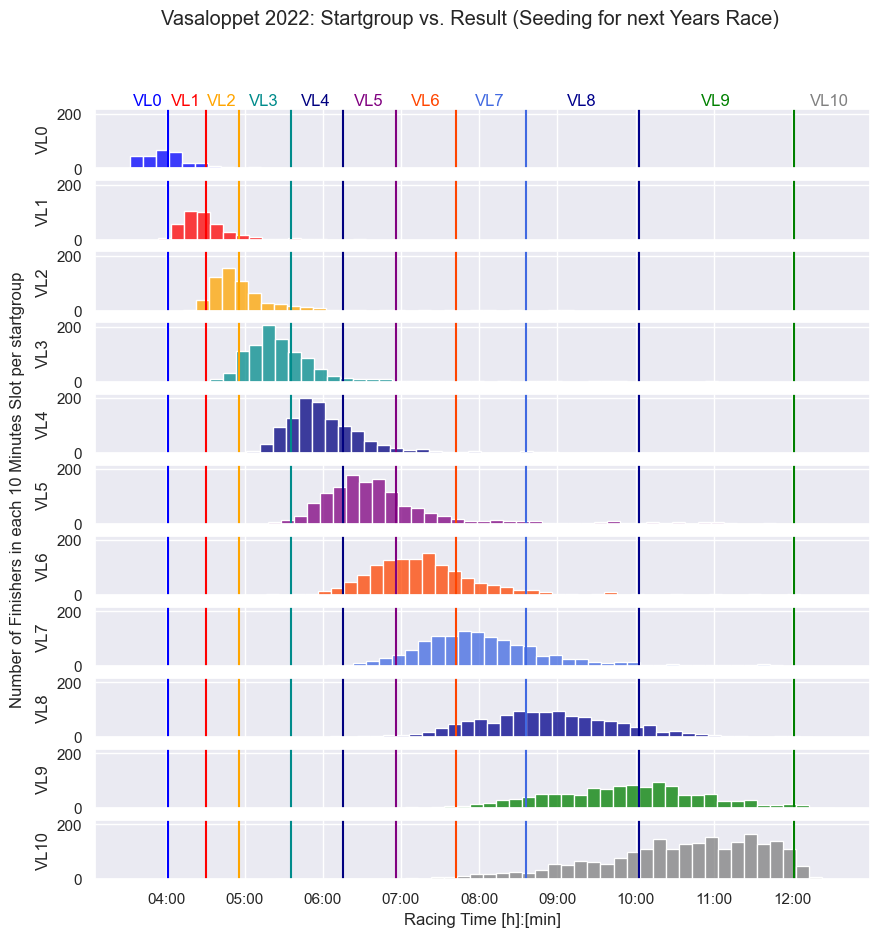

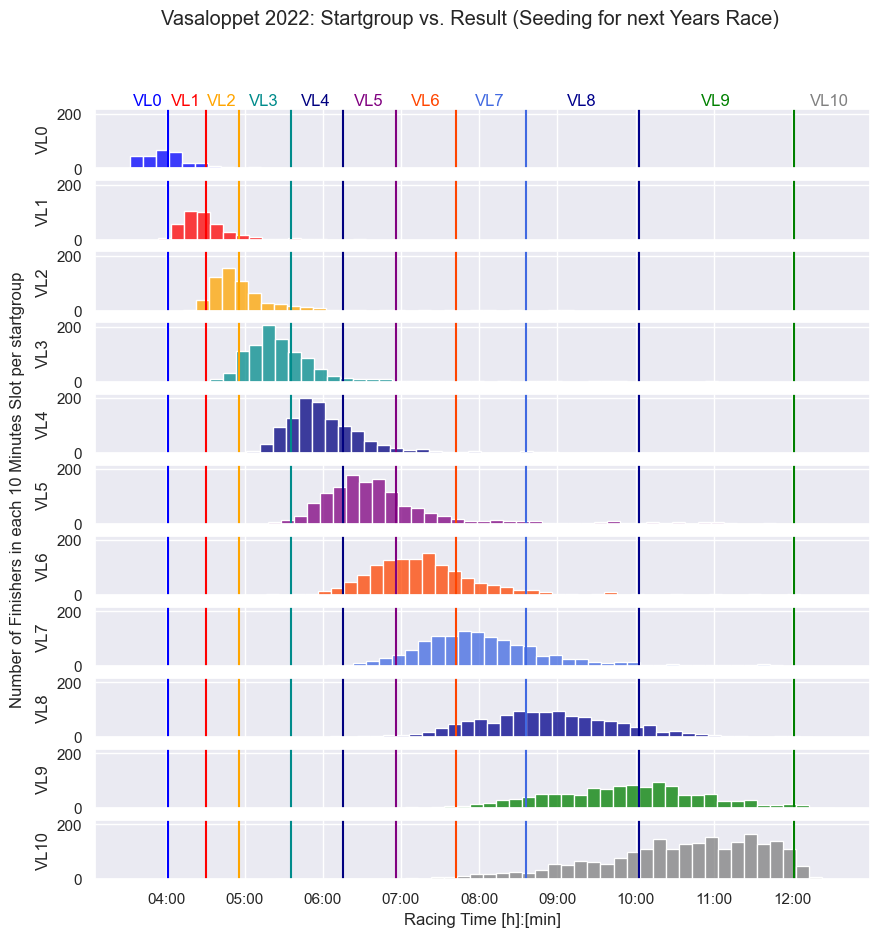

In [833]:


#fig, ax = plt.subplots()
colors = ['blue','red','orange','darkcyan','navy','purple','orangered','royalblue','darkblue','green','gray','black','gold','maroon']
startgroups = ['VL0','VL1','VL2','VL3','VL4','VL5','VL6','VL7','VL8','VL9','VL10']
colors_dict = {startgroups[i]: colors[i] for i in range(len(startgroups))}
i = 0
#startgroups = ['VL0','VL1','VL2']
#startgroups = ['VL2','VL3','VL4']
rev_startgroups = reversed(startgroups)

# initialize 
fig, axes = plt.subplots(len(startgroups), 1, sharex=True, sharey=True, figsize=(10,10))


for startgroup in startgroups:
    # make plot
    sns.histplot(df[df['StartGroup']==startgroup]['Time'], ax=axes[i], color=colors_dict[startgroup], binwidth=1/24/6)

    # draw all lines
    for startgroup2 in startgroups: #VL10 has no seeding
    # Line for new seeding
        if startgroup2 != 'VL10': 
            # add line
            axes[i].axvline(seedning_2022_for_2023_dict[startgroup2], color=colors_dict[startgroup2])
    
    # add text
    if startgroup == 'VL0':
        time_diff = seedning_2022_for_2023_dict[startgroup] - df['Time'].min()
        axes[0].text(seedning_2022_for_2023_dict[startgroup]-time_diff/2-datetime.timedelta(minutes=12), 230, startgroup, fontsize=12, color=colors_dict[startgroup])
    elif startgroup == 'VL10':
        axes[0].text(seedning_2022_for_2023_dict['VL9']+datetime.timedelta(minutes=12), 230, startgroup, fontsize=12, color=colors_dict[startgroup])
    else:
        previous_startgroup = f"VL{int(startgroup.split('VL')[1])-1}"
        time_diff = seedning_2022_for_2023_dict[startgroup] - seedning_2022_for_2023_dict[previous_startgroup]
        axes[0].text(seedning_2022_for_2023_dict[startgroup]-time_diff/2-datetime.timedelta(minutes=12), 230, startgroup, fontsize=12, color=colors_dict[startgroup])

    axes[i].set_ylabel(startgroup)
    i = i+1

# LEGEND
#plt.legend(title='Startgroups', loc='upper left', labels=startgroups)

# title
fig.suptitle('Vasaloppet 2022: Startgroup vs. Result (Seeding for next Years Race)')

# x ticks DateTime
#x_dates = df['Time'].dt.strftime('%H:%M').sort_values().unique()
#ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
# Define the date format
date_form = DateFormatter("%H:%M")
axes[len(startgroups)-1].xaxis.set_major_formatter(date_form)

# set axis labels
axes[len(startgroups)-1].set_xlabel("Racing Time [h]:[min]")

fig.text(0.04, 0.5, 'Number of Finishers in each 10 Minutes Slot per startgroup', va='center', rotation='vertical')

sns.set(rc={'figure.figsize':(15,8)})

# set to True to print
print_mode = False
if print_mode:
    plt.savefig('startgroup_vs_result.png')
    plt.show()
else:
    plt.show()



In [ ]:
# TBD:
# the same as above, but just count (and percentage)
# result as table

In [850]:
startgroups = ['VL0','VL1','VL2','VL3']
i=0
result_list_all = []
for startgroup in startgroups:
    # make plot
    print(startgroup)
    df_startgroup = df[df['StartGroup']==startgroup]
    j=0
    result_list = []
    for startgroup2 in startgroups:
        if startgroup2 == "VL0":
            print(f"{startgroup2}: {seedning_2022_for_2023_dict[startgroup2]}")
            result_list.append(df_startgroup[(df_startgroup['Time'] < seedning_2022_for_2023_dict[startgroup2])]['Time'].shape[0])
        elif startgroup2 == "VL10":
            print("TBD VL10")
        else:
            print(f"{startgroup2}: {seedning_2022_for_2023[j-1]} - {seedning_2022_for_2023_dict[startgroup2]}")
            result_list.append(df_startgroup[(df_startgroup['Time'] >= seedning_2022_for_2023[j-1]) & (df_startgroup['Time'] < seedning_2022_for_2023[j])]['Time'].shape[0])
        j = j+1
    result_list_all.append(result_list)
    i = i+1
print(result_list_all)
# make df with result_list_all und column names
# calculate percentage
# print 
   

VL0
VL0: 2022-09-11 04:00:54
VL1: 2022-09-11 04:00:54 - 2022-09-11 04:30:43
VL2: 2022-09-11 04:30:43 - 2022-09-11 04:55:43
VL3: 2022-09-11 04:55:43 - 2022-09-11 05:35:36
VL1
VL0: 2022-09-11 04:00:54
VL1: 2022-09-11 04:00:54 - 2022-09-11 04:30:43
VL2: 2022-09-11 04:30:43 - 2022-09-11 04:55:43
VL3: 2022-09-11 04:55:43 - 2022-09-11 05:35:36
VL2
VL0: 2022-09-11 04:00:54
VL1: 2022-09-11 04:00:54 - 2022-09-11 04:30:43
VL2: 2022-09-11 04:30:43 - 2022-09-11 04:55:43
VL3: 2022-09-11 04:55:43 - 2022-09-11 05:35:36
VL3
VL0: 2022-09-11 04:00:54
VL1: 2022-09-11 04:00:54 - 2022-09-11 04:30:43
VL2: 2022-09-11 04:30:43 - 2022-09-11 04:55:43
VL3: 2022-09-11 04:55:43 - 2022-09-11 05:35:36
[[151, 105, 20, 10], [4, 239, 116, 20], [0, 28, 326, 194], [0, 0, 52, 628]]


In [835]:
startgroup = 'VL2'
seedning_2022_for_2023_dict[startgroup]

datetime.datetime(2022, 9, 11, 4, 55, 43)

# OLD: tests with many subplots
could not match y and x axes, but actuelly it is nicer with distributions like above

tbd:
* adjust x axis for each subplot column
* fix thing with seedning: only until 9 (error with 10 or 11

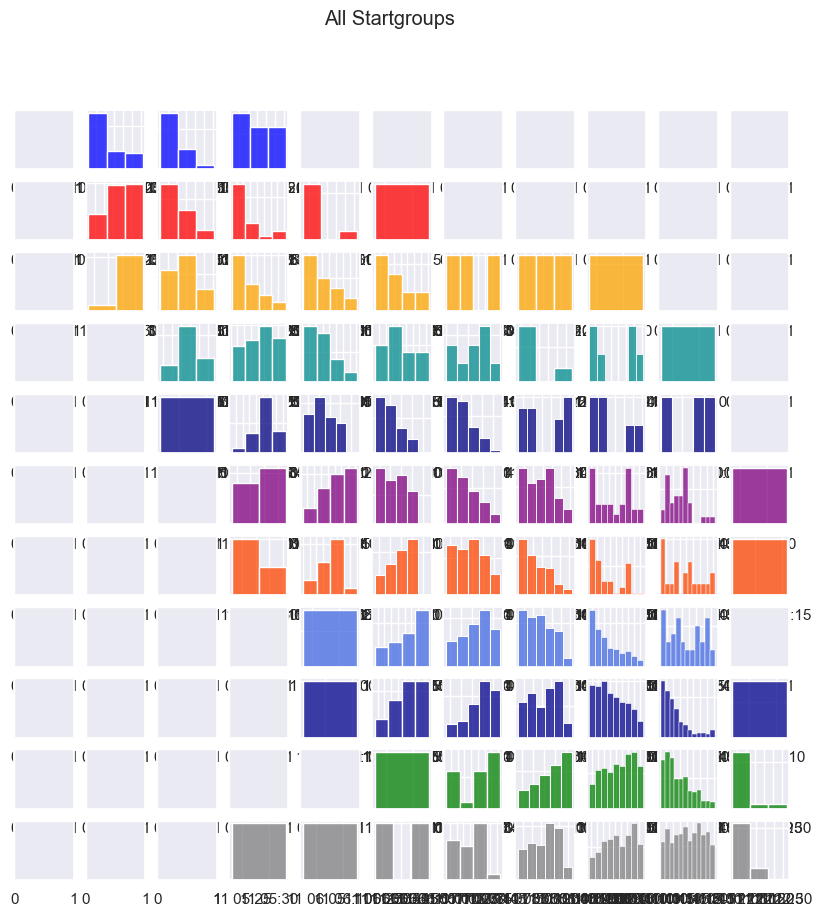

In [711]:

colors = ['blue','red','orange','darkcyan','navy','purple','orangered','royalblue','darkblue','green','gray','black','gold','maroon']
startgroups = list(range(0,11))#['VL0','VL1','VL2','VL3','VL4','VL5','VL6','VL7','VL8','VL9','VL10']
colors_dict = {startgroups[i]: colors[i] for i in range(len(startgroups))}
i = 0

startgroups = list(range(0,11))
# initialize plot
fig, axes = plt.subplots(len(startgroups),len(startgroups), sharex=False, figsize=(10,10))

fig.suptitle('All Startgroups')

i = 0
x = 0
y = 0
for x in list(range(0,len(startgroups))):
    for y in list(range(0,len(startgroups))):
     #   axes[x][y].set_title(f"test {x}{y}")
        if y < 10:
            p = sns.histplot(df[(df['StartGroup_int']==startgroups[x]) & (df['Time'] > seedning_2022_for_2023[startgroups[max(y-1,0)]]) & (df['Time'] <= seedning_2022_for_2023[startgroups[y]])]['Time'], ax=axes[x][y], color=colors_dict[startgroups[x]], binwidth=1/24/6)
        elif y ==10: 
            # no seeding times after 9
            p = sns.histplot(df[(df['StartGroup_int']==startgroups[x]) & (df['Time'] > seedning_2022_for_2023[startgroups[9]])]['Time'], ax=axes[x][y], color=colors_dict[startgroups[x]], binwidth=1/24/6)
        
        # choose range for x axis     
        #axes[x][y].set(xlim=(seedning_2022_for_2023[startgroups[y-1]],seedning_2022_for_2023[startgroups[y]]))
        # make it pretty
        p.set(ylabel=None)
        p.set(xlabel=None)
        p.set(yticklabels=[])

        i = i+1


#plt.show()
#ax1 = fig.add_subplot(len(startgroups),len(startgroups),1)
#ax2 = fig.add_subplot(len(startgroups),len(startgroups),2, sharey = ax1, sharex = ax1)
#ax3 = fig.add_subplot(len(startgroups),len(startgroups),3, sharey = ax1, sharex = ax1)
#ax4 = fig.add_subplot(len(startgroups),len(startgroups),4, sharey = ax1, sharex = ax1)

#ax13 = fig.add_subplot(len(startgroups),len(startgroups),13, sharey = ax4, sharex = ax4)



plt.show()

0

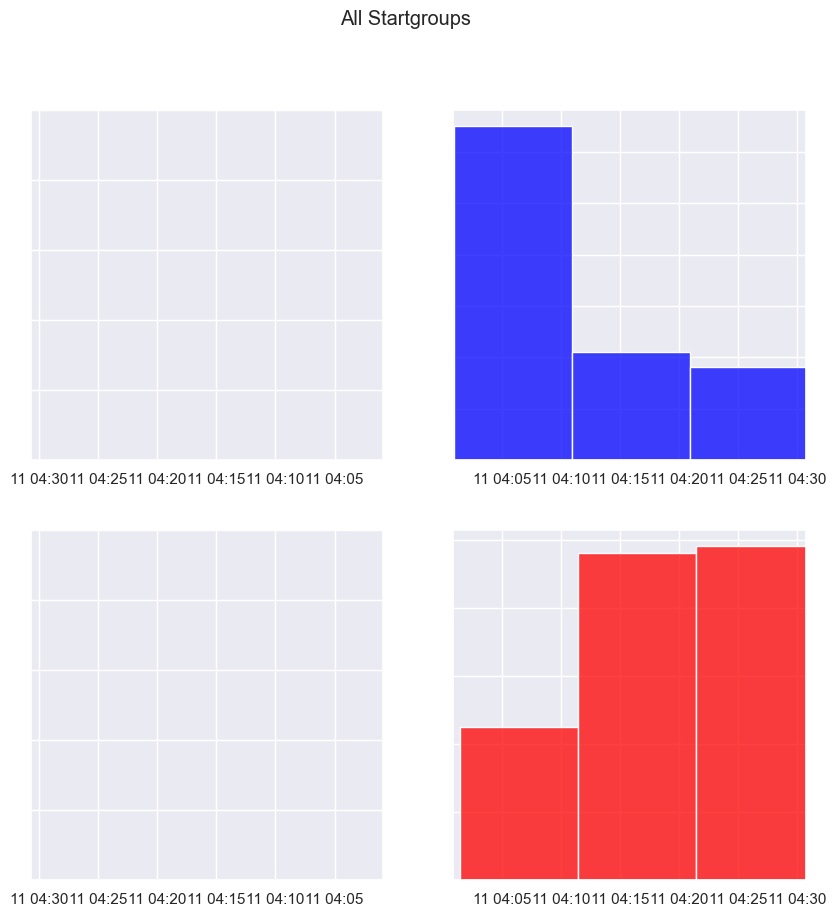

In [709]:

colors = ['blue','red','orange','darkcyan','navy','purple','orangered','royalblue','darkblue','green','gray','black','gold','maroon']
startgroups = list(range(0,11))#['VL0','VL1','VL2','VL3','VL4','VL5','VL6','VL7','VL8','VL9','VL10']
colors_dict = {startgroups[i]: colors[i] for i in range(len(startgroups))}
i = 0

#startgroups = list(range(0,9))
startgroups = list(range(0,2))
# initialize plot
fig, axes = plt.subplots(len(startgroups),len(startgroups), sharex=False, figsize=(10,10))

fig.suptitle('All Startgroups')

i = 0
x = 0
y = 0
for x in list(range(0,len(startgroups))):
    for y in list(range(0,len(startgroups))):
     #   axes[x][y].set_title(f"test {x}{y}")
        if y < 10:
            p = sns.histplot(df[(df['StartGroup_int']==startgroups[x]) & (df['Time'] > seedning_2022_for_2023[startgroups[max(y-1,0)]]) & (df['Time'] <= seedning_2022_for_2023[startgroups[y]])]['Time'], ax=axes[x][y], color=colors_dict[startgroups[x]], binwidth=1/24/6)
            
        elif y ==10: 
            # no seeding times after 9
            p = sns.histplot(df[(df['StartGroup_int']==startgroups[x]) & (df['Time'] > seedning_2022_for_2023[startgroups[9]])]['Time'], ax=axes[x][y], color=colors_dict[startgroups[x]], binwidth=1/24/6)
        
        # choose range for x axis     
        p.set(xlim=(seedning_2022_for_2023[startgroups[y-1]],seedning_2022_for_2023[startgroups[y]]))
        # make it pretty
        p.set(ylabel=None)
        p.set(xlabel=None)
        p.set(yticklabels=[])
        

        i = i+1


#plt.show()
#ax1 = fig.add_subplot(len(startgroups),len(startgroups),1)
#ax2 = fig.add_subplot(len(startgroups),len(startgroups),2, sharey = ax1, sharex = ax1)
#ax3 = fig.add_subplot(len(startgroups),len(startgroups),3, sharey = ax1, sharex = ax1)
#ax4 = fig.add_subplot(len(startgroups),len(startgroups),4, sharey = ax1, sharex = ax1)

#ax13 = fig.add_subplot(len(startgroups),len(startgroups),13, sharey = ax4, sharex = ax4)



plt.show()

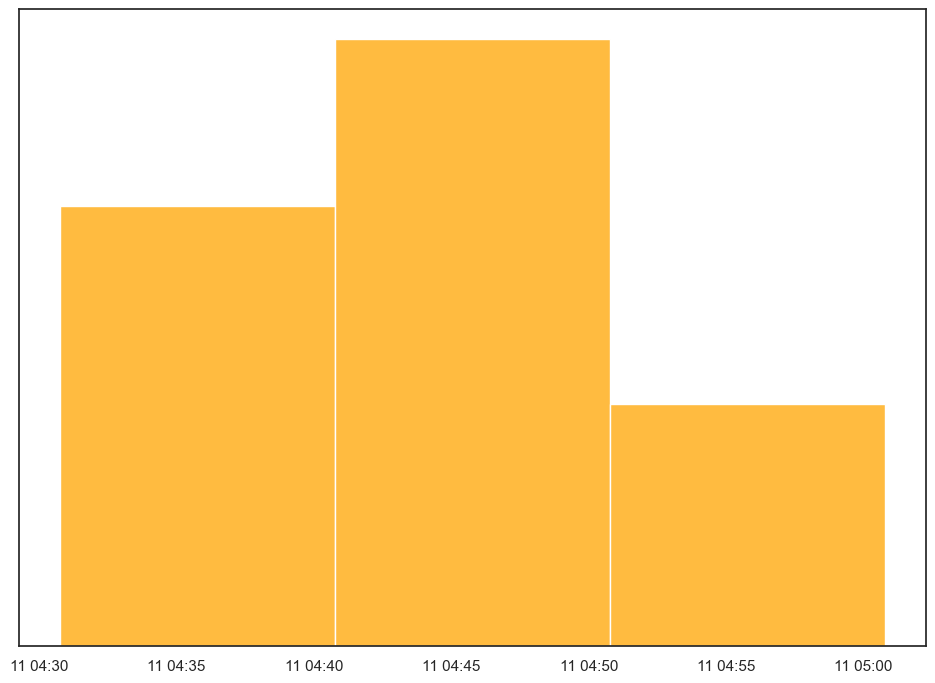

In [657]:
x = 2
y = 2
p = sns.histplot(df[(df['StartGroup_int']==startgroups[x]) & (df['Time'] > seedning_2022_for_2023[startgroups[y-1]]) & (df['Time'] <= seedning_2022_for_2023[startgroups[y]])]['Time'], color=colors_dict[startgroups[x]], binwidth=1/24/6)
p.set(ylabel=None)
p.set(xlabel=None)
p.set(yticklabels=[])
plt.show()


In [ ]:
for startgroup in startgroups:
    sns.histplot(df[df['StartGroup']==startgroup]['Time'], ax=ax, color=colors_dict[startgroup], binwidth=1/24/6)
    #sns.histplot(df[df['StartGroup']=='VL2']['Time'], ax=ax)
    # Line for new seeding
    if startgroup != 'VL10': 
        plt.axvline(seedning_2022_for_2023_dict[startgroup], color=colors_dict[startgroup])
        ax.text(seedning_2022_for_2023_dict[startgroup], 200,seedning_2022_for_2023_dict[startgroup].strftime("%H:%M:%S"), fontsize=12, color=colors_dict[startgroup]) #add text

    i = i+1

In [696]:
x = 3
y = 3
sns.histplot(df[(df['StartGroup_int']==startgroups[x]) & (df['Time'] <= seedning_2022_for_2023[startgroups[x-2]])]['Time'], color=colors_dict[startgroups[x]], binwidth=1/24/6)
plt.show()
sns.histplot(df[(df['StartGroup_int']==startgroups[x]) & (df['Time'] <= seedning_2022_for_2023[startgroups[x-1]])]['Time'], color=colors_dict[startgroups[x]], binwidth=1/24/6)
plt.show()
sns.histplot(df[(df['StartGroup_int']==startgroups[x]) & (df['Time'] <= seedning_2022_for_2023[startgroups[x]])]['Time'], color=colors_dict[startgroups[x]], binwidth=1/24/6)
plt.show()
sns.histplot(df[(df['StartGroup_int']==startgroups[x]) & (df['Time'] <= seedning_2022_for_2023[startgroups[x+1]])]['Time'], color=colors_dict[startgroups[x]], binwidth=1/24/6)
plt.show()

IndexError: list index out of range

In [640]:
x = 2
for y in list(range(0,9)):
    print(f"y = {y} {df[(df['StartGroup_int']==startgroups[x]) & (df['Time'] > seedning_2022_for_2023[startgroups[y-1]])& (df['Time'] <= seedning_2022_for_2023[startgroups[y]])]['Time'].shape[0]}")


y = 0 0
y = 1 29
y = 2 325
y = 3 195
y = 4 38
y = 5 7
y = 6 3
y = 7 3
y = 8 3


In [543]:
seedning_2022_for_2023_dict[startgroup]

datetime.datetime(2022, 3, 12, 6, 15, 40)

## old

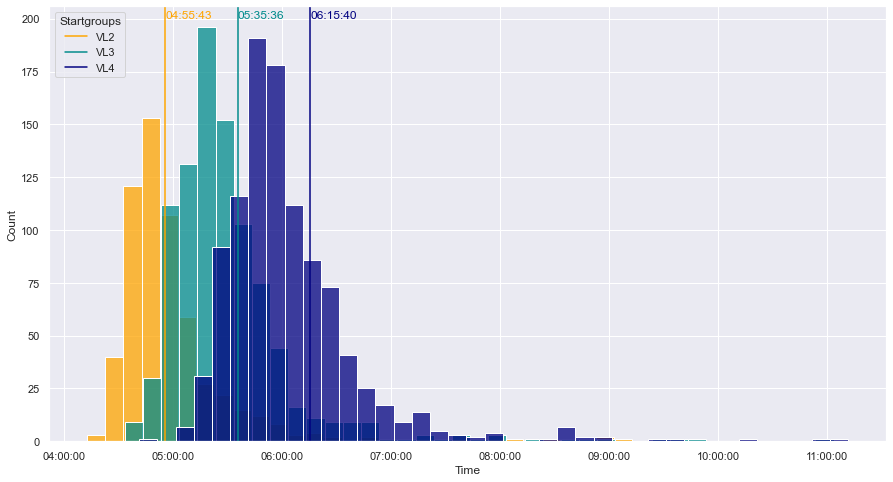

In [504]:


fig, ax = plt.subplots()
colors = ['blue','red','orange','darkcyan','navy','purple','orangered','royalblue','darkblue','green','gray','black','gold','maroon']
startgroups = ['VL0','VL1','VL2','VL3','VL4','VL5','VL6','VL7','VL8','VL9','VL10']
colors_dict = {startgroups[i]: colors[i] for i in range(len(startgroups))}
i = 0
#startgroups = ['VL0','VL1','VL2']
startgroups = ['VL2','VL3','VL4']
rev_startgroups = reversed(startgroups)
for startgroup in startgroups:
    sns.histplot(df[df['StartGroup']==startgroup]['Time'], ax=ax, color=colors_dict[startgroup], binwidth=1/24/6)
    #sns.histplot(df[df['StartGroup']=='VL2']['Time'], ax=ax)
    # Line for new seeding
    if startgroup != 'VL10': 
        plt.axvline(seedning_2022_for_2023_dict[startgroup], color=colors_dict[startgroup])
        ax.text(seedning_2022_for_2023_dict[startgroup], 200,seedning_2022_for_2023_dict[startgroup].strftime("%H:%M:%S"), fontsize=12, color=colors_dict[startgroup]) #add text

    i = i+1

# LEGEND
plt.legend(title='Startgroups', loc='upper left', labels=startgroups)

# x ticks DateTime
x_dates = df['Time'].dt.strftime('%H:%M:%S').sort_values().unique()
#ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
# Define the date format
date_form = DateFormatter("%H:%M:%S")
ax.xaxis.set_major_formatter(date_form)

sns.set(rc={'figure.figsize':(15,8)})




{'VL0': 'blue', 'VL1': 'red', 'VL2': 'orange', 'VL3': 'cyan', 'VL4': 'navy', 'VL5': 'purple', 'VL6': 'maroon', 'VL7': 'green', 'VL8': 'tomato', 'VL9': 'gray', 'VL10': 'black'}


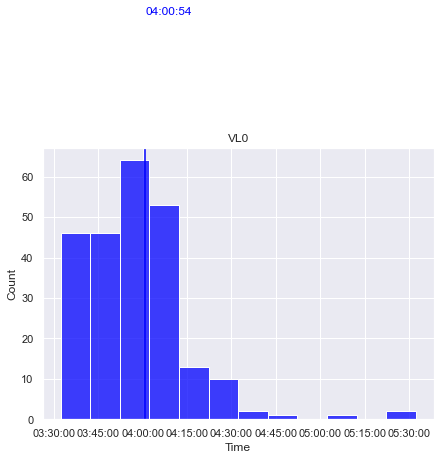

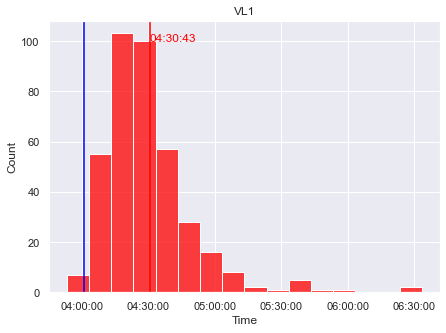

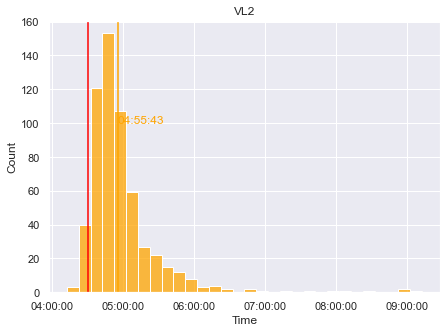

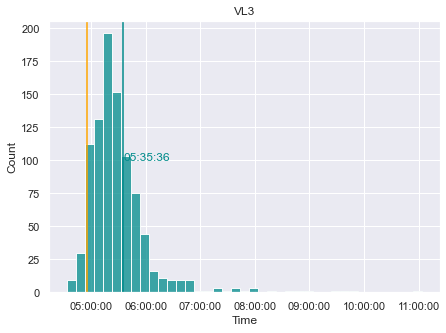

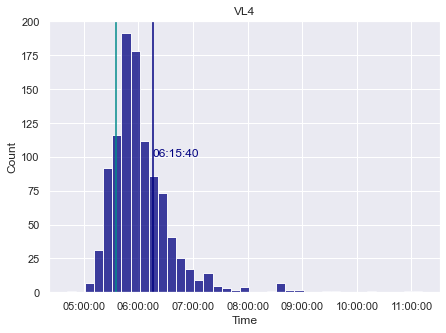

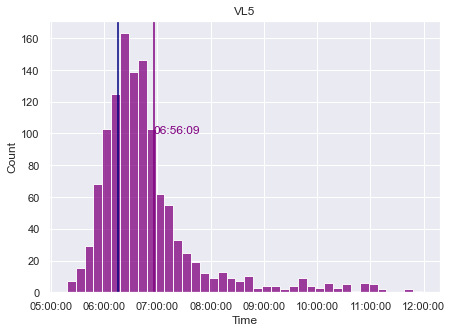

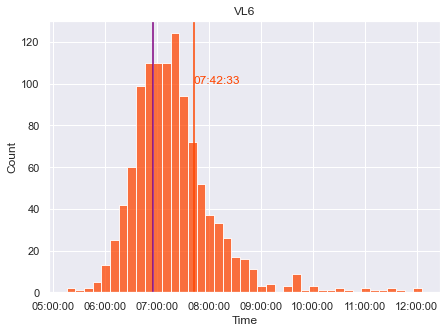

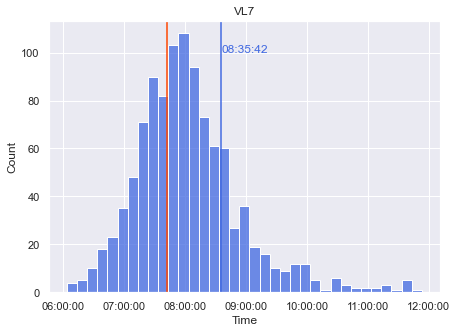

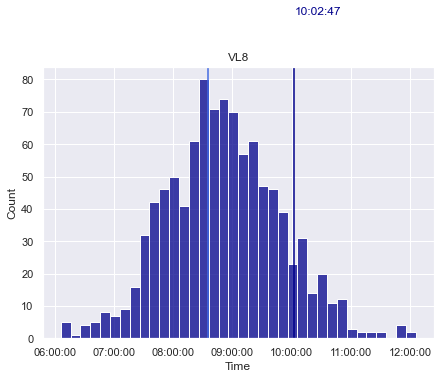

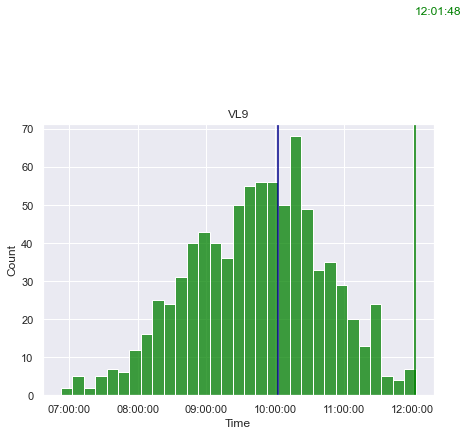

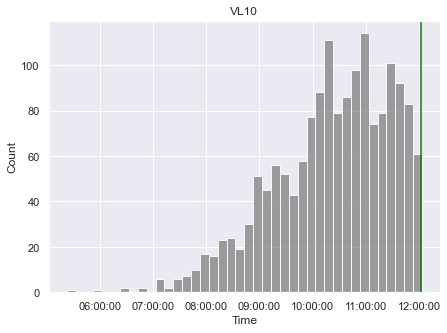

In [512]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

sns.set(rc={'figure.figsize':(7,5)})

colors = ['blue','red','orange','darkcyan','navy','purple','orangered','royalblue','darkblue','green','gray','black','gold','maroon']
startgroups = ['VL0','VL1','VL2','VL3','VL4','VL5','VL6','VL7','VL8','VL9','VL10']
colors_dict = {startgroups[i]: colors[i] for i in range(len(startgroups))}
print(res)
i = 0
#startgroups = ['VL0','VL1','VL2']
#startgroups = ['VL2','VL3','VL4']

#startgroups = df['StartGroup'].unique()#[0:-1]
for startgroup in startgroups:
    sg_int = df[df['StartGroup']==startgroup]['StartGroup_int'].unique()[0]
    prev_sg = f"VL{sg_int-1}"
    fig, ax = plt.subplots()
    sns.histplot(df[df['StartGroup']==startgroup]['Time'], ax=ax, color=colors_dict[startgroup], binwidth=1/24/6)
    #sns.histplot(df[df['StartGroup']=='VL2']['Time'], ax=ax)
    # Lines for new seeding
    # faster group
    if startgroup != 'VL0':
        plt.axvline(seedning_2022_for_2023_dict[prev_sg], color=colors_dict[prev_sg])
    # slower group
    if startgroup != 'VL10': 
        plt.axvline(seedning_2022_for_2023_dict[startgroup], color=colors_dict[startgroup])
        ax.text(seedning_2022_for_2023_dict[startgroup], 100,seedning_2022_for_2023_dict[startgroup].strftime("%H:%M:%S"), fontsize=12, color=colors_dict[startgroup]) #add text

    plt.title(startgroup)
    # x ticks DateTime
    x_dates = df['Time'].dt.strftime('%H:%M:%S').sort_values().unique()
    #ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
    # Define the date format
    date_form = DateFormatter("%H:%M:%S")
    ax.xaxis.set_major_formatter(date_form)

    i = i+1





## better startgroup in 2023

how many have qualified for a better group for next year?
hypothesis: it is hard to qualify in vasa, better to do a seeding race


In [430]:
def get_startgroup_changes(df, startgroups_wish):
    # startgroups in df
    startgroups_avail = df['StartGroup'].unique()
    # take intersection of wished for startgroups and available startgroups
    startgroups = [sg1 for sg1 in startgroups_wish if sg1 in startgroups_avail]
    result = []
    for sg in startgroups:
        sg_int = df[df['StartGroup']==sg]['StartGroup_int'].unique()[0]
        prev_sg = f"VL{sg_int-1}"
        n_winning = sum(df[df['StartGroup']==sg]['Time'] <= seedning_2022_for_2023_dict[prev_sg]) if sg != 'VL0' else 0
        n_staying = sum(df[df['StartGroup']==sg]['Time'] <= seedning_2022_for_2023_dict[sg]) if sg != 'VL10' else sum(df[df['StartGroup']==sg]['Time'] > seedning_2022_for_2023_dict[prev_sg]) #VL10: lowest group, no minimal time limit
        n_losing = sum(df[df['StartGroup']==sg]['Time'] > seedning_2022_for_2023_dict[sg]) if sg != 'VL10' else 0
        result = result + [[sg, sg_int, n_winning, n_staying, n_losing]]
    result_df = pd.DataFrame(result, columns=['StartGroup','StartGroup_int','n_winning','n_staying','n_losing'])
    return(result_df)


In [458]:
startgroups = df['StartGroup'].unique()
print(startgroups)
df_startgroups_n = get_startgroup_changes(df,startgroups).sort_values(by=['StartGroup_int'], axis=0).reset_index(drop=True)

df_startgroups_n['count'] = df_startgroups_n['n_winning']+df_startgroups_n['n_staying']+df_startgroups_n['n_losing']

# calculate percentages
df_startgroups_n['winning_perc'] = df_startgroups_n['n_winning']/df_startgroups_n['count']
df_startgroups_n['staying_perc'] = df_startgroups_n['n_staying']/df_startgroups_n['count']
df_startgroups_n['losing_perc'] = df_startgroups_n['n_losing']/df_startgroups_n['count']

df_startgroups_n[['StartGroup','winning_perc','staying_perc','losing_perc']]


['VL0' 'VL1' 'VL2' 'VL3' 'VL4' 'VL6' 'VL5' 'VL10' 'VL7' 'VL8' 'VL9']


,StartGroup,winning_perc,staying_perc,losing_perc
0,VL0,0.000000,0.613445,0.386555
1,VL1,0.010256,0.617949,0.371795
2,VL2,0.047078,0.571429,0.381494
3,VL3,0.053115,0.673136,0.273749
4,VL4,0.140940,0.648490,0.210570
5,VL5,0.201051,0.571616,0.227332
6,VL6,0.246397,0.582704,0.170899
7,VL7,0.263928,0.584262,0.151811
8,VL8,0.288667,0.633642,0.077691
9,VL9,0.375552,0.624448,0.000000


In [449]:
df_startgroups_n

,StartGroup,StartGroup_int,n_winning,n_staying,n_losing,count,winning_perc,staying_perc,losing_perc
0,VL0,0,0,146,92,238,0.000000,0.613445,0.386555
1,VL1,1,4,241,145,390,0.010256,0.617949,0.371795
2,VL2,2,29,352,235,616,0.047078,0.571429,0.381494
3,VL3,3,52,659,268,979,0.053115,0.673136,0.273749
4,VL4,4,168,773,251,1192,0.140940,0.648490,0.210570
5,VL5,5,306,870,346,1522,0.201051,0.571616,0.227332
6,VL6,6,359,849,249,1457,0.246397,0.582704,0.170899
7,VL7,7,379,839,218,1436,0.263928,0.584262,0.151811
8,VL8,8,405,889,109,1403,0.288667,0.633642,0.077691
9,VL9,9,510,848,0,1358,0.375552,0.624448,0.000000


In [450]:
df_startgroups_n['n_winning'].sum()/df_startgroups_n['count'].sum()

0.31339614911921343

# Sandbox

In [394]:
tmp = []
tmp + [1,'asdf']

[1, 'asdf']

In [388]:
tmp = 4 if 4<5 else 1
tmp

4

In [19]:
int((10-1)/2)

4

In [128]:
tmp = df['Time'].iloc[1]
tmp

'03:32:19'

In [132]:
date_time_obj = datetime.datetime.strptime(tmp, '%H:%M:%S')
date_time_obj

datetime.datetime(1900, 1, 1, 3, 32, 19)

0     2022-03-12 03:32:18
1     2022-03-12 03:32:19
2     2022-03-12 03:32:20
3     2022-03-12 03:32:21
4     2022-03-12 03:32:21
              ...        
995   2022-03-12 04:55:36
996   2022-03-12 04:55:39
997   2022-03-12 04:55:45
998   2022-03-12 04:55:48
999   2022-03-12 04:55:53
Name: Time, Length: 1000, dtype: datetime64[ns]

In [170]:
df1 = pd.DataFrame([[1,2],[3,4]])
df1

,0,1
0,1,2
1,3,4


In [172]:
df2 = pd.DataFrame([[1,2],[6,7]])
df2

,0,1
0,1,2
1,6,7


In [176]:
pd.concat([df1.reset_index(drop=True),df2.reset_index(drop=True)], axis=0)


,0,1
0,1,2
1,3,4
0,1,2
1,6,7


In [175]:
df

,Bib,Group,Name,Nation,Sex,Place,StartGroup,Time,Place_cat,Year
0,M15,H21,"Nygaard, Andreas",NOR,M,1,VL0,2022-03-12 03:32:18,1,2022
1,M4,H21,"Persson, Emil",SWE,M,2,VL0,2022-03-12 03:32:19,2,2022
2,M49,H21,"Jutterström, Axel",SWE,M,3,VL0,2022-03-12 03:32:20,3,2022
3,M29,H21,"Stadaas, Kasper",NOR,M,4,VL0,2022-03-12 03:32:21,4,2022
4,M32,H21,"Thele, Joar Andreas",NOR,M,5,VL0,2022-03-12 03:32:21,5,2022
...,...,...,...,...,...,...,...,...,...,...
995,3482,H45,"Hlavacek, Josef",CZE,M,1040,VL2,2022-03-12 04:55:36,996,2022
996,2575,H55,"Andersson, Ola",SWE,M,1041,VL2,2022-03-12 04:55:39,997,2022
997,3867,H21,"Thyselius, Fredrik",SWE,M,1043,VL3,2022-03-12 04:55:45,998,2022
998,4010,H50,"Olsson, Johan",SWE,M,1044,VL3,2022-03-12 04:55:48,999,2022


In [252]:
df['StartGroup_int'] = df['StartGroup'].str.extract('(\d+)', expand=False).astype(int)
df

,Bib,Group,Name,Nation,Sex,Place,StartGroup,Time,Place_cat,Year,StartGroup_int
0,M15,H21,"Nygaard, Andreas",NOR,M,1,VL0,2022-03-12 03:32:18,1,2022,0
1,M4,H21,"Persson, Emil",SWE,M,2,VL0,2022-03-12 03:32:19,2,2022,0
2,M49,H21,"Jutterström, Axel",SWE,M,3,VL0,2022-03-12 03:32:20,3,2022,0
3,M29,H21,"Stadaas, Kasper",NOR,M,4,VL0,2022-03-12 03:32:21,4,2022,0
4,M32,H21,"Thele, Joar Andreas",NOR,M,5,VL0,2022-03-12 03:32:21,5,2022,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,4490,H60,"Cuenot, Michel",SUI,M,4256,VL4,2022-03-12 06:42:16,3996,2022,4
3995,10358,H21,"Pettersson, Johan",SWE,M,4257,VL5,2022-03-12 06:42:16,3997,2022,5
3996,5134,H21,"Martinsson, Hugo",SWE,M,4258,VL5,2022-03-12 06:42:18,3998,2022,5
3997,5506,H45,"Maryska, Ondrej",CZE,M,4259,VL5,2022-03-12 06:42:19,3999,2022,5
